In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as sts

In [2]:
data = pd.read_csv("/home/gedhusek/Downloads/13720_18513_bundle_archive.zip")

# Getting familiar with our data

In [3]:
data.head() # We will try our best to create the model for charges prediction based on other features

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum() #We dont have any missing values so thats very convinient for us

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.info() #As we can see, we have some object columns. We must deal with them - convert them into numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
data["sex"] # - converting this column wont be hard, we have two possible ways to go.
#The first is to assign the value for each sex. The second is to use dummies
dummies = pd.get_dummies(data["sex"],drop_first=True)
data = pd.concat([data,dummies],axis=1)
data = data.drop("sex",axis=1)

In [7]:
data["smoker"] #Same approach here, we will use get_dummies to convert these values
dummies = pd.get_dummies(data["smoker"],drop_first=True)
data = pd.concat([data,dummies],axis=1)
data = data.drop("smoker",axis=1)

In [8]:
data["region"] #we have 4 different values here, so we will use get_dummies as well
dummies = pd.get_dummies(data["region"],drop_first=True)
data = pd.concat([data,dummies],axis=1)
data = data.drop("region",axis=1)

In [9]:
data.info() #At this state, our data is converted into right form, so we can begin with creating our model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age          1338 non-null int64
bmi          1338 non-null float64
children     1338 non-null int64
charges      1338 non-null float64
male         1338 non-null uint8
yes          1338 non-null uint8
northwest    1338 non-null uint8
southeast    1338 non-null uint8
southwest    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.4 KB


In [10]:
#Lets define our dependent and independent variables

In [11]:
X = data.drop("charges",axis=1).values
y = data["charges"].values

In [12]:
#Time fot train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
#Scaling the data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
#Creating the model
model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))

In [21]:
#Compiling the model
model.compile(loss="mse",optimizer="adam")

In [22]:
#defining our callback
early_stopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=40)

In [23]:
#Fitting the model
model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stopping])

Epoch 1/500
30/30 [==============================] - 1s 18ms/step - loss: 332544704.0000 - val_loss: 299563360.0000
Epoch 2/500
30/30 [==============================] - 0s 4ms/step - loss: 332527040.0000 - val_loss: 299530400.0000
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 332464864.0000 - val_loss: 299438880.0000
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 332321664.0000 - val_loss: 299206048.0000
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 331942432.0000 - val_loss: 298649248.0000
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 331026496.0000 - val_loss: 297408832.0000
Epoch 7/500
30/30 [==============================] - 0s 5ms/step - loss: 329145216.0000 - val_loss: 294727936.0000
Epoch 8/500
30/30 [==============================] - 0s 7ms/step - loss: 324915040.0000 - val_loss: 289412384.0000
Epoch 9/500
30/30 [==============================] - 0s 3ms/step - loss: 317290

30/30 [==============================] - 0s 2ms/step - loss: 83092792.0000 - val_loss: 40131896.0000
Epoch 73/500
30/30 [==============================] - 0s 5ms/step - loss: 81439616.0000 - val_loss: 40286596.0000
Epoch 74/500
30/30 [==============================] - 0s 6ms/step - loss: 79764576.0000 - val_loss: 39548784.0000
Epoch 75/500
30/30 [==============================] - 0s 4ms/step - loss: 84920800.0000 - val_loss: 39213944.0000
Epoch 76/500
30/30 [==============================] - 0s 6ms/step - loss: 86459984.0000 - val_loss: 39299344.0000
Epoch 77/500
30/30 [==============================] - 0s 8ms/step - loss: 79095488.0000 - val_loss: 39121692.0000
Epoch 78/500
30/30 [==============================] - 0s 6ms/step - loss: 72721240.0000 - val_loss: 38222144.0000
Epoch 79/500
30/30 [==============================] - 0s 4ms/step - loss: 80353616.0000 - val_loss: 38295696.0000
Epoch 80/500
30/30 [==============================] - 0s 4ms/step - loss: 79989888.0000 - val_loss: 3

30/30 [==============================] - 0s 4ms/step - loss: 82798120.0000 - val_loss: 37462936.0000
Epoch 144/500
30/30 [==============================] - 0s 3ms/step - loss: 81323072.0000 - val_loss: 36212672.0000
Epoch 145/500
30/30 [==============================] - 0s 3ms/step - loss: 84377032.0000 - val_loss: 36814380.0000
Epoch 146/500
30/30 [==============================] - 0s 4ms/step - loss: 78500328.0000 - val_loss: 37199520.0000
Epoch 147/500
30/30 [==============================] - 0s 4ms/step - loss: 81103784.0000 - val_loss: 36837948.0000
Epoch 148/500
30/30 [==============================] - 0s 4ms/step - loss: 77267392.0000 - val_loss: 36260964.0000
Epoch 149/500
30/30 [==============================] - 0s 4ms/step - loss: 79007864.0000 - val_loss: 36692336.0000
Epoch 150/500
30/30 [==============================] - 0s 3ms/step - loss: 84039624.0000 - val_loss: 38773040.0000
Epoch 151/500
30/30 [==============================] - 0s 3ms/step - loss: 80826872.0000 - val

In [24]:
loss_df = pd.DataFrame(model.history.history)

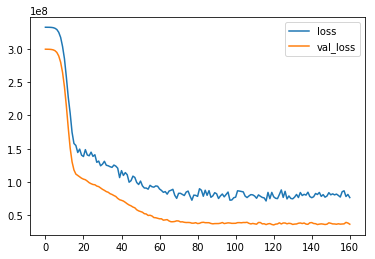

In [25]:
#Plotting the loss
loss_df.plot()

In [26]:
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error

In [34]:
print(mean_absolute_error(y_test,predictions)) #Our mean absolute error is 3660 dollars

3660.253072973842


In [37]:
predictions = pd.Series(predictions.reshape(402,))

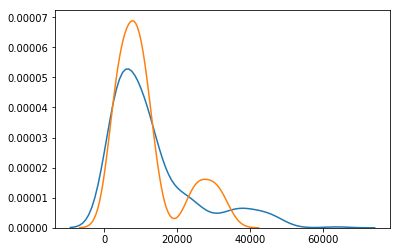

In [38]:
sns.kdeplot(y_test)
sns.kdeplot(predictions.values)

In [39]:
#Our model didnt find a way how to deal with ourliers. We had a small sample for training, so thats the reason

In [40]:
error= mean_absolute_error(y_test,predictions)

In [42]:
error/(data["charges"].mean()/100) #we are off by 27.5 percent

27.582039213541787